# Project Title:
## Exploratory Data Analysis(EDA & Cleaning On Iris Dataset)

1. Introducationn
2. Data Loading
3. Data Cleaning & Preprocessing
4. exploratory Data Analysis (EDA)
5. Insights & Conclusion

## Objective

The objective of this notebook is to perform data cleaning and exploratory data analysis (EDA) on a given dataset in order to identify patterns, trends, summary statistics, and relationships between numerical feature

## Task 1: Data Cleaning and Preprocessing
### Data Cleaning and Preparation using Pandas
Dataset: Iris Dataset

This notebook demonstrates basic data cleaning steps using pandas, including loading data, checking for missing values, removing duplicates, and standardizing categorical variables.

## 1. Import Libraries and Load Dataset

In [1]:
# Import pandas library
import pandas as pd

In [2]:
# Load the Iris dataset
df=pd.read_csv("C:/Users/PC/Desktop/Codveda/Data Set For Task/1) iris.csv")

## 2. Understand Dataset Structure

In [3]:
#To understand the dataset structure

df.head()  # Display first five rows

df.info()  # Check dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 3. Identify Missing Values

We check for missing values across all columns. If missing values exist, they can be handled via imputation or removal.

In [4]:
#Objective 2: identify and hand missng values

df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No missing values in any column, since no missing values were found; therefore no imputation or removal was required.

## 4. Identify and Remove Duplicate Rows

In [5]:
#Remove duplicates rows and standardize inconsistent data formats

df.duplicated().sum()   # Check number of duplicate rows

np.int64(3)

In [6]:
# Remove duplicate rows

df = df.drop_duplicates()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 5. Standardize Categorical Variables

The species column is standardized by converting all values to lowercase and removing extra whitespace.

In [7]:
#To standardize categorical variables
df["species"] = df["species"].str.lower().str.strip()

# Verify changes
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## 6. Final Validation

Final checks to ensure data cleanliness.

In [8]:
#Verify dataset shape after removing duplicates

df.shape   # Final dataset shape

df.isna().sum()   # Confirm no missing values remain

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Conclusion

The dataset has been successfully cleaned and prepared. It contains no missing values, duplicate rows have been removed, and categorical data has been standardized for consistency.

# Task 2: Exploratory Data Analysis (EDA)

Description: Perform an exploratory analysis on a given dataset to identify patterns, trends, and summary statistics.

## Objectives:
- Calculate summary statistics (mean, median, mode,
standard deviation).
- Visualize data distributions using histograms, boxplots,
and scatter plots.
- Find correlations between numerical features.

## Summary Statistics

This section calculates the mean, median, mode, and standard deviation of numerical features.

In [9]:
mean = df.mean(numeric_only=True)
median = df.median(numeric_only=True)
mode = df.mode(numeric_only=True).iloc[0]
std = df.std(numeric_only=True)


summary_stats = pd.DataFrame({
"Mean": mean,
"Median": median,
"Mode": mode,
"Standard Deviation": std
})


summary_stats

,Mean,Median,Mode,Standard Deviation
sepal_length,5.856463,5.8,5.0,0.829100
sepal_width,3.055782,3.0,3.0,0.437009
petal_length,3.780272,4.4,1.4,1.759111
petal_width,1.208844,1.3,0.2,0.757874


## Data Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10


## Figure 1: Histograms of Numerical Features

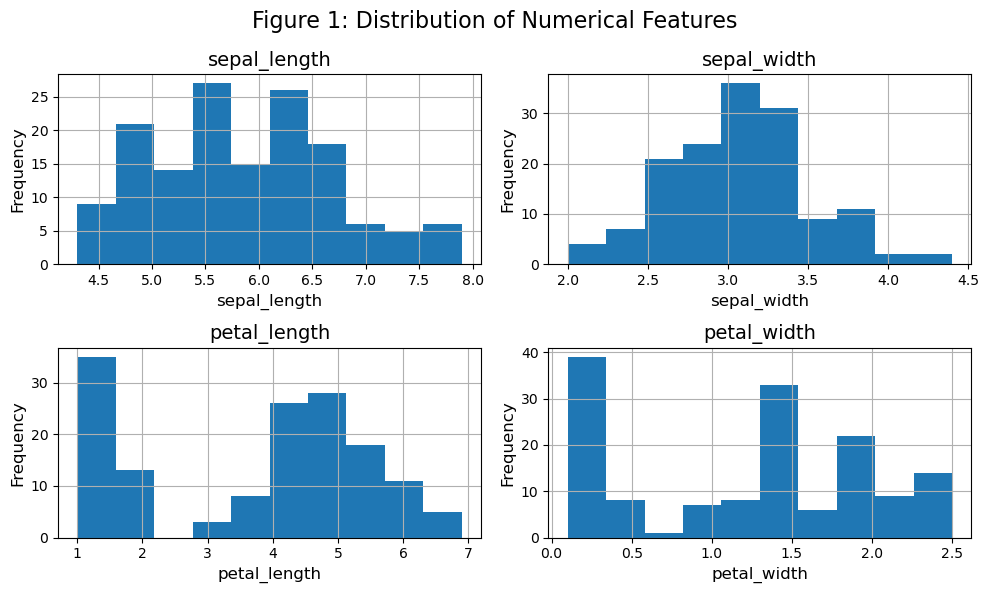

In [18]:
axes = df.hist()

for ax, col in zip(axes.flatten(), df.select_dtypes(include='number').columns):
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.suptitle("Figure 1: Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

**Figure 1:** Histograms showing the distribution of numerical features in the dataset. 
The plots provide insight into the spread, central tendency, and skewness of each variable.

## Figure 2: Boxplot of Numerical Features

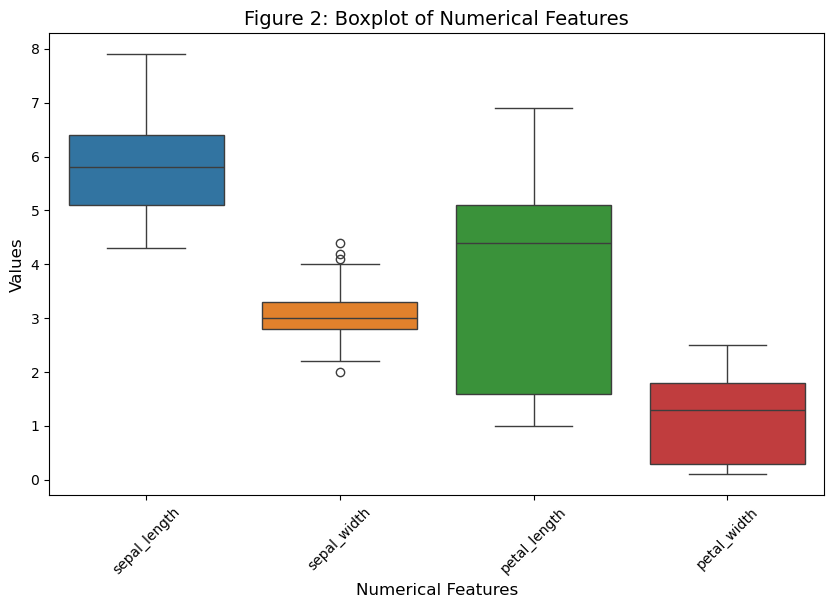

In [25]:
plt.figure()

sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=45)

plt.xlabel("Numerical Features")
plt.ylabel("Values")
plt.title("Figure 2: Boxplot of Numerical Features")

plt.show()

**Figure 2:** Boxplots illustrating the spread and presence of outliers in numerical features. This visualization helps identify variability and extreme values in the dataset.

## Scatter Plot

## Figure 3: Scatter Plot (Feature Relationship

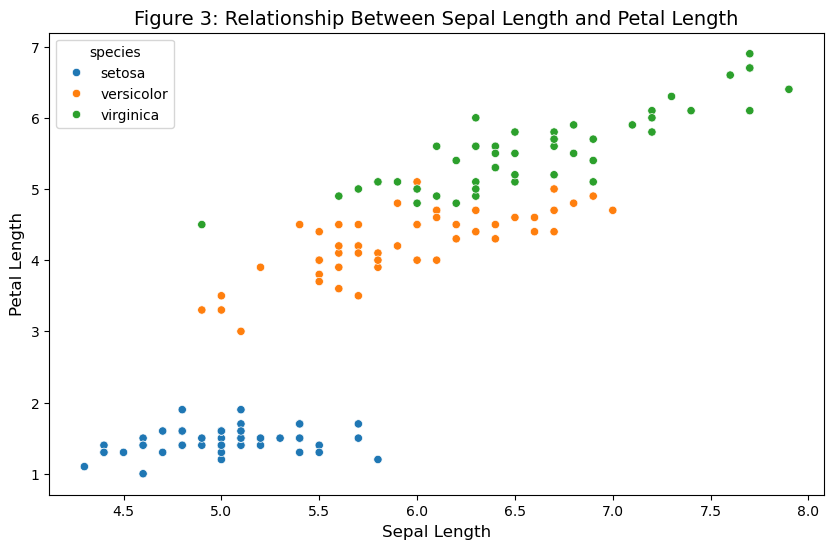

In [20]:
plt.figure()

sns.scatterplot(x="sepal_length", y="petal_length", hue="species", data=df)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Figure 3: Relationship Between Sepal Length and Petal Length")

plt.show()


**Figure 3:** Scatter plot showing the relationship between sepal length and petal length.
Distinct clustering suggests these features are useful for species differentiation.

In [13]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Correlation Analysis

In [15]:
correlation_matrix = df.select_dtypes(include='number').corr()
correlation_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


## Figure 4: Correlation Heatmap

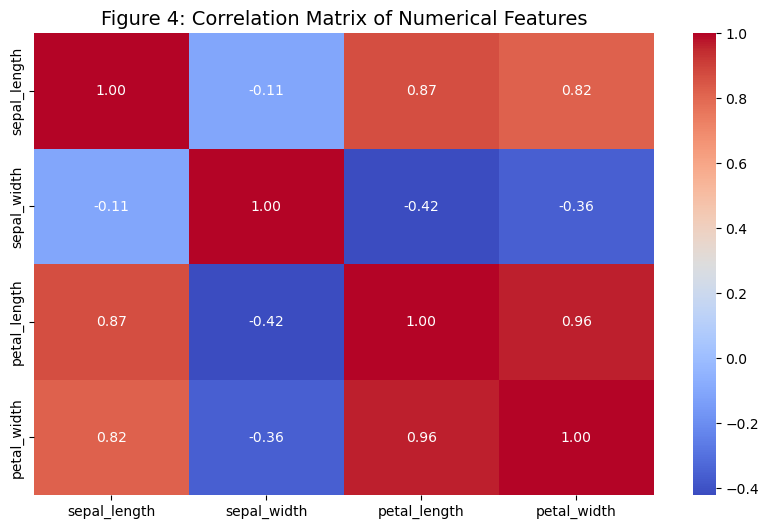

In [21]:
plt.figure()

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Figure 4: Correlation Matrix of Numerical Features")
plt.show()


**Figure 4:** Heatmap representing correlations between numerical variables.
Strong positive correlations indicate potential feature importance for predictive modeling.


## Key Insight 

- Petal length and petal width have a strong positive correlation.

- Sepal features show weaker correlations compared to petal features.

- Clear separability exists between species, indicating suitability for classification models.

## Conclusion

This exploratory data analysis provided insights into the structure and relationships within the dataset. The findings can support feature selection and future predictive modeling tasks.

In [26]:
from matplotlib.backends.backend_pdf import PdfPages

In [27]:
with PdfPages("Iris_EDA_Visualizations.pdf") as pdf:

    # ---------- Figure 1: Histograms ----------
    axes = df.hist(figsize=(10, 8))

    for ax, col in zip(axes.flatten(), df.select_dtypes(include='number').columns):
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")

    plt.suptitle("Figure 1: Distribution of Numerical Features", fontsize=16)
    plt.tight_layout()
    pdf.savefig()   # Save current figure to PDF
    plt.close()

    # ---------- Figure 2: Boxplot ----------
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df.select_dtypes(include='number'))
    plt.xticks(rotation=45)
    plt.xlabel("Numerical Features")
    plt.ylabel("Values")
    plt.title("Figure 2: Boxplot of Numerical Features")
    pdf.savefig()
    plt.close()

    # ---------- Figure 3: Scatter Plot ----------
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x="sepal_length",
        y="petal_length",
        hue="species",
        data=df
    )
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.title("Figure 3: Sepal Length vs Petal Length")
    pdf.savefig()
    plt.close()

    # ---------- Figure 4: Correlation Heatmap ----------
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        df.select_dtypes(include='number').corr(),
        annot=True,
        fmt=".2f",
        cmap="coolwarm"
    )
    plt.title("Figure 4: Correlation Matrix")
    pdf.savefig()
    plt.close()

# Export EDA Visuals to PDF (with Cover Page)

In [29]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# timestamp for filename
today = datetime.now().strftime("%Y-%m-%d")

pdf_filename = f"Iris_EDA_Visualizations_{today}.pdf"

with PdfPages(pdf_filename) as pdf:

    # =======================
    # COVER PAGE
    # =======================
    plt.figure(figsize=(11, 8.5))
    plt.axis("off")

    plt.text(
        0.5, 0.7,
        "Exploratory Data Analysis (EDA)\nIris Dataset",
        ha="center", va="center",
        fontsize=22, fontweight="bold"
    )

    plt.text(
        0.5, 0.55,
        "Submitted by: Alex Mathias\n\nTools: Python, Pandas, Matplotlib, Seaborn",
        ha="center", va="center",
        fontsize=14
    )

    plt.text(
        0.5, 0.4,
        f"Date: {today}",
        ha="center", va="center",
        fontsize=12
    )

    pdf.savefig()
    plt.close()

    # =======================
    # FIGURE 1: HISTOGRAMS
    # =======================
    axes = df.hist(figsize=(10, 8))

    for ax, col in zip(axes.flatten(), df.select_dtypes(include='number').columns):
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")

    plt.suptitle("Figure 1: Distribution of Numerical Features", fontsize=16)
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # =======================
    # FIGURE 2: BOXPLOT
    # =======================
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df.select_dtypes(include='number'))
    plt.xticks(rotation=45)
    plt.xlabel("Numerical Features")
    plt.ylabel("Values")
    plt.title("Figure 2: Boxplot of Numerical Features")
    pdf.savefig()
    plt.close()

    # =======================
    # FIGURE 3: SCATTER PLOT
    # =======================
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x="sepal_length",
        y="petal_length",
        hue="species",
        data=df
    )
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.title("Figure 3: Sepal Length vs Petal Length")
    pdf.savefig()
    plt.close()

    # =======================
    # FIGURE 4: CORRELATION HEATMAP
    # =======================
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        df.select_dtypes(include='number').corr(),
        annot=True,
        fmt=".2f",
        cmap="coolwarm"
    )
    plt.title("Figure 4: Correlation Matrix of Numerical Features")
    pdf.savefig()
    plt.close()

print(f"PDF successfully created: {pdf_filename}")

PDF successfully created: Iris_EDA_Visualizations_2026-01-26.pdf
